In [1]:
import pandas as pd
data=pd.read_csv('gowalla_checkins.csv')
del data['datetime']
data.head()

,userid,placeid
0,1338,482954
1,1338,580963
2,1338,365256
3,1338,89504
4,1338,1267135


In [2]:
#add each pair to a hash table for efficient searching
d=pd.read_csv('gowalla_friendship.csv')
d.head()

,userid1,userid2
0,1,63488
1,1,2
2,1,3
3,1,4
4,1,5


In [3]:
k=pd.read_csv('gowalla_spots_subset1.csv')
maxD=k['radius_meters'].max()


In [4]:
e=pd.read_csv('gowalla_spots_subset1.csv')
e=e.rename(columns={"id":"placeid"})
e.drop(e.columns[[1, 4,5,7,8,9,10,11]], axis = 1, inplace = True)
balanced_data=pd.merge(e,data, on = "placeid", how = "inner")

#balanced_data.drop(balanced_data.columns[[1,2,3]], axis = 1, inplace = True)
balanced_data=pd.DataFrame.drop_duplicates(balanced_data)
balanced_data.head()

,placeid,lng,lat,users_count,userid
0,8904,-94.607499,39.052318,21,1
72,8904,-94.607499,39.052318,21,151
73,8904,-94.607499,39.052318,21,159
74,8904,-94.607499,39.052318,21,25
75,8904,-94.607499,39.052318,21,847


In [5]:
datal=balanced_data.drop(balanced_data.columns[[3,4]], axis = 1)
place_clustering_data=pd.DataFrame.drop_duplicates(datal)

In [6]:
place_clustering_data.head()

,placeid,lng,lat
0,8904,-94.607499,39.052318
114,8932,-97.254356,32.927662
179,8936,-94.591995,39.053318
249,8938,-94.590311,39.052824
661,8947,-122.029631,37.331880


In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data=place_clustering_data.sample(500)
data.isna().sum()

placeid    0
lng        0
lat        0
dtype: int64

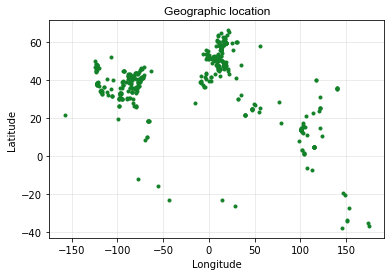

In [9]:
_=plt.plot(data['lng'],data['lat'],marker='.',linewidth=0,color='#128128')
_=plt.grid(which='major',color='#cccccc',alpha=0.45)
_=plt.title('Geographic location',family='Arial',fontsize=12)
_=plt.xlabel('Longitude')
_=plt.ylabel('Latitude')

In [10]:
dbscan_data=data[['lng','lat']]
dbscan_data=dbscan_data.values.astype('float32',copy=False)

In [11]:
dbscan_data_scaler=StandardScaler().fit(dbscan_data)
dbscan_data=dbscan_data_scaler.transform(dbscan_data)

In [12]:
model=DBSCAN(eps=0.25,min_samples=5,metric='euclidean').fit(dbscan_data)
model

DBSCAN(eps=0.25)

In [13]:
outliers_df=data[model.labels_==-1]
clusters_df=data[model.labels_!=-1]
colors=model.labels_
colors_clusters=colors[colors!=-1]
color_outliers='black'
clusters=Counter(model.labels_)
print(clusters)
print(data[model.labels_==-1].head())
print('Number of clusters ={}'.format(len(clusters)-1))

Counter({1: 209, 0: 184, -1: 31, 2: 29, 5: 16, 3: 15, 7: 6, 4: 5, 6: 5})
          placeid         lng        lat
19406357   702825  -68.005800  10.181547
34991161  7194977   56.243348  57.998206
34837934  7141502   77.040081  28.438526
17241904   547531  -43.334163 -22.999275
34952430  7181342  106.721250  -6.278030
Number of clusters =8


In [14]:
model.labels_

array([ 0,  1, -1,  2,  1,  1,  1,  0,  0,  0,  1,  1,  3,  0,  4,  3,  1,
        5,  1,  1,  1,  1,  6,  1,  3,  3,  0,  1,  1,  2,  0,  0,  3,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  7,  2, -1,  4,  0,  0,  0,  1,  1,
        0,  7,  1,  0,  1,  1,  0,  2,  1,  0,  0,  1, -1, -1,  2,  0,  1,
        1,  0,  0,  0, -1,  0,  1,  1,  1,  1, -1,  1,  1,  0,  1, -1,  0,
        0,  0,  0,  1, -1,  1,  1,  1,  1,  2,  1,  1,  0,  2, -1,  6,  1,
        1,  1,  1,  3,  6,  1,  1,  4,  0,  1,  0,  1,  1,  1,  0,  0,  0,
        1,  1,  1,  0,  3,  0, -1,  1,  5,  2,  0,  3,  5,  0,  1,  2,  1,
        1,  0,  1,  0,  0,  0,  0,  1,  0,  4,  0,  1,  0,  1,  0,  0,  1,
        5,  0,  0,  0,  7,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  4,
        0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  0,  5,  1,  1,  1,  1,
        1,  1,  1,  0,  0,  1,  3,  1,  1,  1,  0,  0,  0,  0,  5,  0,  1,
        0,  2,  0, -1,  0,  0,  2,  1,  1,  2, -1,  0,  0,  1,  1,  1,  5,
        0,  1,  1,  0, -1

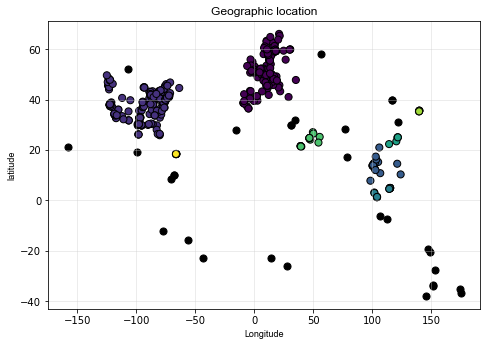

In [15]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
ax.scatter(clusters_df['lng'],clusters_df['lat'],c=colors_clusters,edgecolors='black',s=50)
ax.scatter(outliers_df['lng'],outliers_df['lat'],c=color_outliers,edgecolors='black',s=50)
ax.set_xlabel('Longitude',family='Arial',fontsize=9)
ax.set_ylabel('latitude',family='Arial',fontsize=9)
plt.title('Geographic location',family='Arial',fontsize=12)
plt.grid(which='major',color='#cccccc',alpha=0.45)
plt.show()

In [16]:
def calculate_contributing_users(p1,p2):
    cu=0
    for i in p1:
        l=d[d['userid1']==i]
        r=l['userid2'].values
        q=set(r).intersection(p2)
        cu=cu+len(q)
        
    return cu       
            

In [17]:
def check_social_distance(df,new_clusters_df):
    p1=[]
    p2=[]
    for i in df['placeid']:
        f=balanced_data[balanced_data['placeid']==i]
        p1=f['userid'].values
        sd=[]
        mean=0
        for j in df['placeid']:
            if(i!=j):
                r=balanced_data[balanced_data['placeid']==j]
                p2=r['userid'].values
                k=set(p1).intersection(p2)
                union_p1_p2=len(p1)+len(p2)-len(k)
                q1=set(p1)
                q2=set(p2)
                q1=q1-k
                q2=q2-k
                contributing_users=calculate_contributing_users(q1,q2)
                social_distance=(contributing_users+len(k))/union_p1_p2
                sd.append(social_distance)
                mean=mean+social_distance
        mean_sd=mean/len(df['placeid'])
        #tou value is 0.001 here
        if(mean_sd<0.0001):
            df=df.drop(df[df.placeid==i].index)   
    return len(df),df
        
            
            
            
    

In [18]:
new_clusters_df=pd.DataFrame()
labels=[]
cluster_no=0

In [20]:
for i in range(len(clusters)-1):
    length,df=check_social_distance(data[model.labels_==i],new_clusters_df)
    for j in range(length):
        labels.append(cluster_no)
    if(len(df)>0):
        cluster_no=cluster_no+1
    new_clusters_df=new_clusters_df.append(df)

In [21]:
new_clusters_df

,placeid,lng,lat
24998728,1206921,7.000358,51.446287
28611890,2479996,10.602841,59.677388
23240015,1028207,6.782630,51.225174
9991922,185894,9.513443,47.026414
27283264,1500296,-1.149039,52.952249
...,...,...,...
6784810,96547,-66.069384,18.453482
3645775,44835,-66.166883,18.437820
30124267,4838519,-65.965238,18.392338
33451889,6775494,-66.162403,18.415112


In [22]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [23]:
new_colors=labels
new_colors_clusters=colors[colors!=-1]
new_clusters=Counter(labels)
print(new_clusters)
print('Number of clusters ={}'.format(len(new_clusters)-1))

Counter({1: 160, 0: 118, 2: 14, 4: 12, 3: 7, 5: 5})
Number of clusters =5


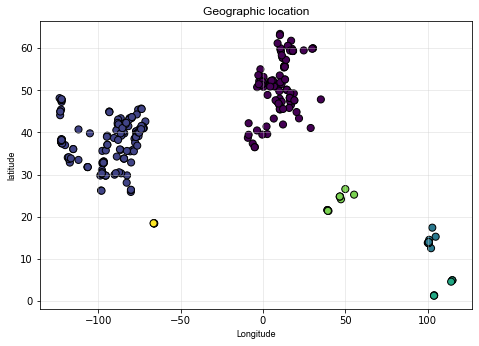

In [24]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
ax.scatter(new_clusters_df['lng'],new_clusters_df['lat'],c=new_colors,edgecolors='black',s=50)
ax.set_xlabel('Longitude',family='Arial',fontsize=9)
ax.set_ylabel('latitude',family='Arial',fontsize=9)
plt.title('Geographic location',family='Arial',fontsize=12)
plt.grid(which='major',color='#cccccc',alpha=0.45)
plt.show()